# Ploting well log data with Matplotlib

### Importando bibliotecas

In [53]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importando dataset

In [54]:
las = lasio.read('dataset/1-ALV-2-BA.las')

In [55]:
# transformando o .LAS em Pandas DataFrame
well = las.df()

Visão geral do dataframe

In [56]:
well.shape # (lines,columns)

(14712, 7)

In [57]:
well.describe()

,DENS,GR,ILD,ILM,NEU,POROSITY-DENSITY,VSH_GR
count,7303.000000,14582.000000,11773.000000,11781.000000,7283.000000,7271.000000,11599.000000
mean,2.532359,59.150312,6.792009,16.749459,24.642476,0.071582,0.625658
std,0.071275,22.461530,205.814736,372.057697,9.540318,0.042550,0.199973
min,2.172968,9.904538,0.381091,0.434117,-0.005261,0.000000,0.025524
25%,2.480328,41.961970,1.713314,1.720467,15.957955,0.039709,0.492017
50%,2.536462,59.993195,2.119830,2.138058,26.020800,0.068615,0.613509
75%,2.584346,76.834138,2.913234,2.976667,33.468245,0.102865,0.792035
max,2.747859,205.164400,10000.000000,10000.000000,43.705800,0.289110,1.000000


In [58]:
well.head()

,DENS,GR,ILD,ILM,NEU,POROSITY-DENSITY,VSH_GR
MD,,,,,,,
3.8100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.2672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.4196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preparando o dataset

Observar que 'MD' (profundidade) é o index do DataFrame. É interessante alterar isso, e transformá-lo em mais uma coluna do DataFrame. Isso é realizado abaixo:

In [59]:
well.reset_index(inplace=True)

In [60]:
# Checando a alteração
well.head()

,MD,DENS,GR,ILD,ILM,NEU,POROSITY-DENSITY,VSH_GR
0,3.8100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.2672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.4196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Alterando título de colunas:

Será alterado o nome da coluna 'POROSITY-DENSITY' para 'PHID'

In [61]:
well.rename(columns={'POROSITY-DENSITY':'PHID'}, inplace=True)

In [62]:
# Checando a alteração:
well.head()

,MD,DENS,GR,ILD,ILM,NEU,PHID,VSH_GR
0,3.8100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.2672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.4196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plots rápidos do Pandas

Utilizando o método do Pandas '.plot(x, y)' é possível ter uma rápida visualização

<AxesSubplot:xlabel='GR'>

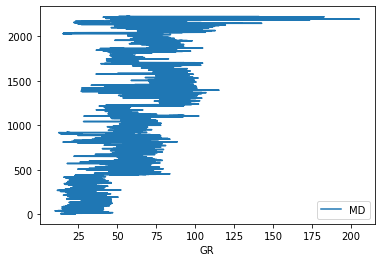

In [63]:
well.plot('GR', 'MD')

É possível visualizar todos os logs rapidamente com o mesmo método.
Isso é útil para controle da extensão de cada uma das curvas, para visualizar possíveis spikes, etc.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

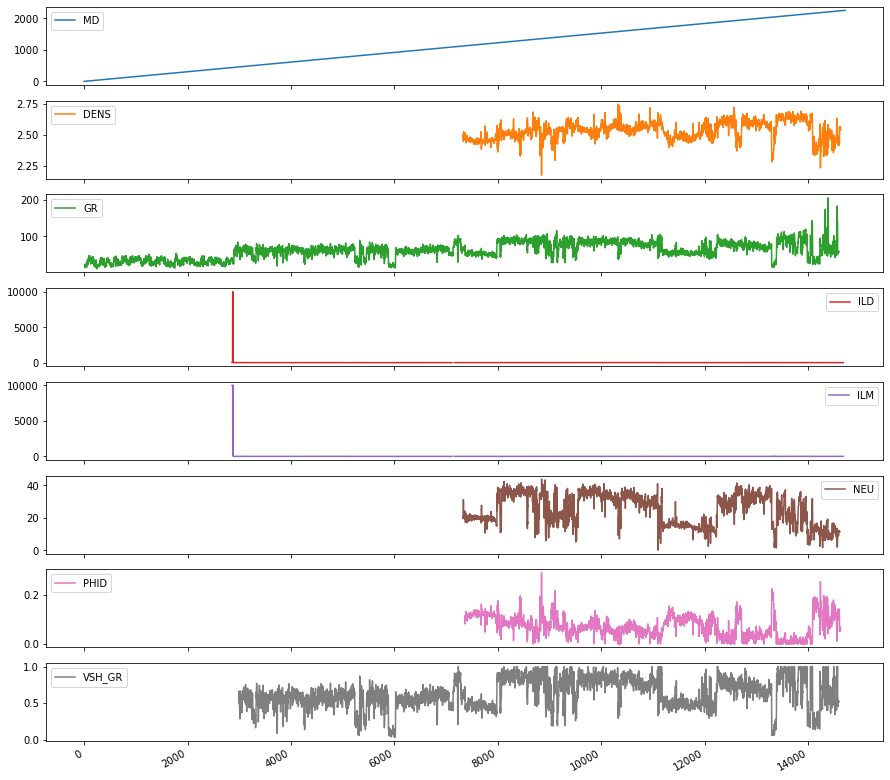

In [64]:
# o argumento 'subplots=True' cria um subplot de todas as colunas do DataFrame
# figsize ajusta o tamanho dos gráficos
well.plot(subplots=True, figsize=(15, 15))

## Plots com Matplotlib

Estrutura dos gráficos no Matplotlib: Figure > Axes > Axis

<img src='images/matplotlib_estrutura.png' style='width:400px;height:400px'/>

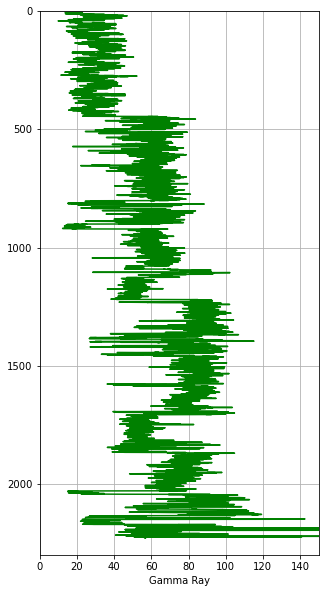

In [65]:
# Definindo a figura e tamanho da figura
fig = plt.subplots(figsize=(5 ,10)) 

# Definindo o número de axes e a posição desses subplot na figura 'fig'
# plt.subplot2grid((n° de linhas, n° de colunas), (posição x da figura, posição y da figura))
ax1 = plt.subplot2grid((1, 1), (0, 0))

# Definindo os axis (curvas)
ax1.plot('GR', 'MD', data=well, color='green') #definindo variáveis e cor
ax1.set_xlabel('Gamma Ray')   # Título da Curva
ax1.set_xlim(0, 150)   # Limites do eixo x
ax1.set_ylim(2300, 0)   # limites do eixo y => invertendo

ax1.grid()  # inserindo grid no gráfico


### Adicionando outras curvas

Adicionando Resistividade (2 tracks)

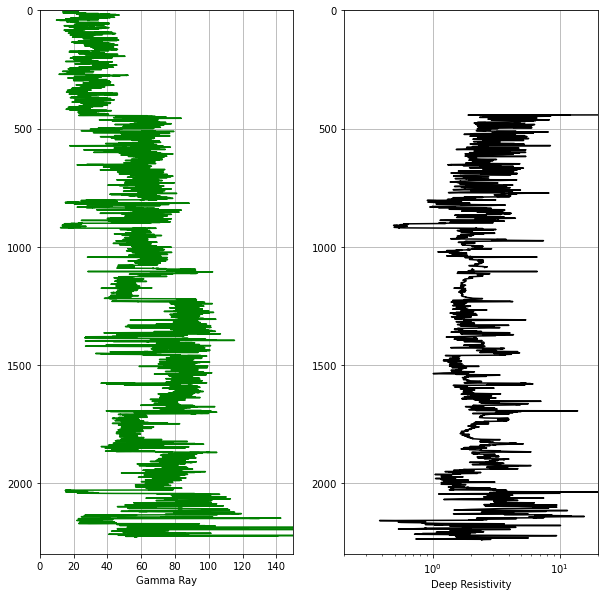

In [66]:
# Repetindo parte do código anterior
fig = plt.subplots(figsize=(10,10))

# Criando os 2 axes a serem utilizados
# Alterando o número de colunas de 1 para 2 => 2 tracks
ax1 = plt.subplot2grid((1, 2), (0, 0))   # axes 1
ax2 = plt.subplot2grid((1,2), (0, 1))    # axes 2

# Definindos axis do axes 1
ax1.plot('GR', 'MD', data=well, color='green')
ax1.set_xlabel('Gamma Ray')
ax1.set_xlim(0, 150)
ax1.set_ylim(2300, 0)

# Definindos axis do axes 2
ax2.plot('ILD', 'MD', data=well, color='black')
ax2.set_xlabel('Deep Resistivity')
ax2.semilogx()  # Aplicando escala logarítmica ao eixo x
ax2.set_xlim(0.2, 20)
ax2.set_ylim(2300, 0)

#inserindo grid nas figuras
ax1.grid()
ax2.grid()

Adicionado Densidade (3 tracks)

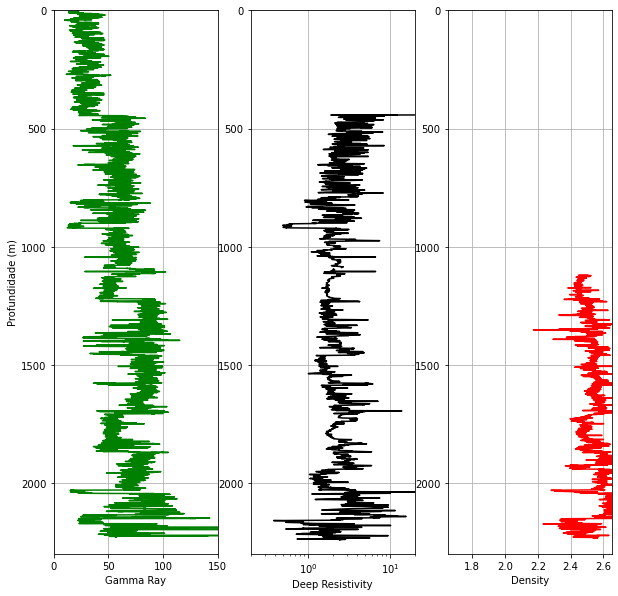

In [67]:
fig = plt.subplots(figsize= (10, 10))

ax1= plt.subplot2grid((1, 3), (0, 0))
ax2= plt.subplot2grid((1, 3), (0, 1))
ax3= plt.subplot2grid((1, 3), (0, 2))

ax1.plot('GR', 'MD', data=well, color='green')
ax1.set_xlabel('Gamma Ray')
ax1.set_ylabel('Profundidade (m)')
ax1.set_xlim(0, 150)
ax1.set_ylim(2300, 0)
ax1.grid()

ax2.plot('ILD', 'MD', data=well, color='black')
ax2.set_xlabel('Deep Resistivity')
ax2.set_xlim(0.2, 20)
ax2.set_ylim(2300, 0)
ax2.semilogx()
ax2.grid()

ax3.plot('DENS', 'MD', data=well, color='red')
ax3.set_xlabel('Density')
ax3.set_xlim(1.65, 2.65)
ax3.set_ylim(2300, 0)
ax3.grid()

### Criando loop para modificações a serem repetidas para cada um dos axes

Ao declararmos duas variáveis no momento da criação da figura, a primeira fica associada à figura em si, e a segunda fica associada aos Axes.

Dessa forma, é possivel utilizar isso para realizar iterações. O exemplo abaixo é para maior entendimento dessa característica:

Informações da Figura:  Figure(144x144)
Informações dos Axes:  AxesSubplot(0.125,0.125;0.775x0.755)
É possível iterar figure.axes, da seguinte forma:

Iterações na variável Axes:
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


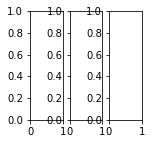

In [68]:
# Reconstruindo a figura do início para nova aplicação

figure, axes = plt.subplots(figsize=(2, 2))  # usando duas variáveis

ax1= plt.subplot2grid((1, 3), (0, 0))
ax2= plt.subplot2grid((1, 3), (0, 1))
ax3= plt.subplot2grid((1, 3), (0, 2))

print(f'Informações da Figura: ', figure)
print(f'Informações dos Axes: ', axes)
print('É possível iterar figure.axes, da seguinte forma:\n')
print('Iterações na variável Axes:')
for item in figure.axes:
    print(item)

### Aplicando este conceito ao dataset

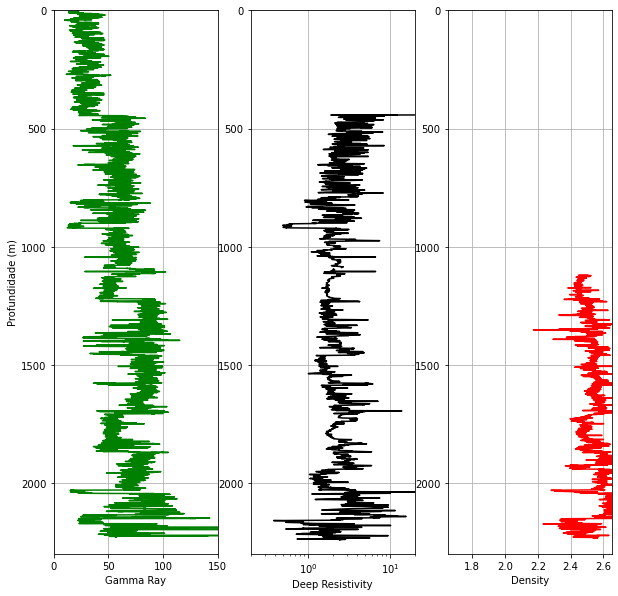

In [69]:
fig, axes = plt.subplots(figsize=(10,10))

# Lista com o nome das curvas
curve_names = ['Gamma Ray', 'Deep Resistivity', 'Density']

# Criando os axes
ax1= plt.subplot2grid((1, 3), (0, 0))
ax2= plt.subplot2grid((1, 3), (0, 1))
ax3= plt.subplot2grid((1, 3), (0, 2))

ax1.plot('GR', 'MD', data=well, color='green')
ax1.set_ylabel('Profundidade (m)')
ax1.set_xlim(0, 150)

ax2.plot('ILD', 'MD', data=well, color='black')
ax2.set_xlim(0.2, 20)
ax2.semilogx()

ax3.plot('DENS', 'MD', data=well, color='red')
ax3.set_xlim(1.65, 2.65)

for x, ax in enumerate(fig.axes):
    ax.set_ylim(2300, 0)
    ax.grid()
    ax.set_xlabel(curve_names[x])


### Retirando labels desnecessários de profundidade

In [70]:
# Removendo os labels dos Axes 2 e 3
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)

# Diminuindo o espaço entre os Axes
fig.subplots_adjust(wspace=0.05)

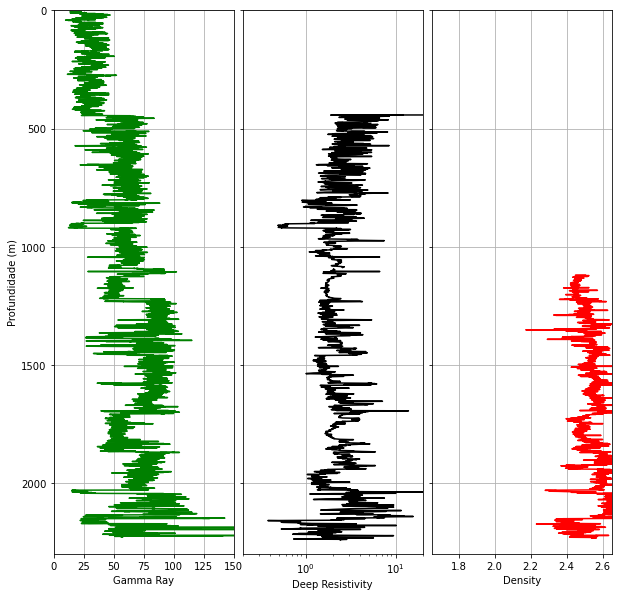

In [71]:
fig

## Inserindo mais de uma curva no mesmo Track

Para isso é utilizado o método '.twiny()' que cria um Axes gêmeo (Twin Axes), que compartilha o eixo y.

Inserindo Neutrão:

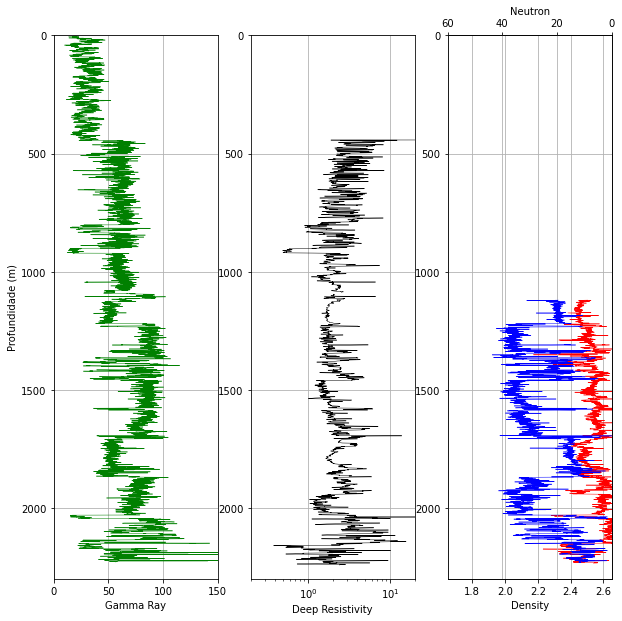

In [72]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma Ray', 'Deep Resistivity', 'Density', 'Neutron']

# Criando os axes
# Perceba que o número de colunas não é aumentado!
ax1= plt.subplot2grid((1, 3), (0, 0))
ax2= plt.subplot2grid((1, 3), (0, 1))
ax3= plt.subplot2grid((1, 3), (0, 2))

# NOVIDADE!
ax4= ax3.twiny()

ax1.plot('GR', 'MD', data=well, color='green', lw =0.5) #lw para alterar a espessura da linha
ax1.set_ylabel('Profundidade (m)')
ax1.set_xlim(0, 150)

ax2.plot('ILD', 'MD', data=well, color='black', lw =0.5)
ax2.set_xlim(0.2, 20)
ax2.semilogx()

ax3.plot('DENS', 'MD', data=well, color='red', lw =0.5)
ax3.set_xlim(1.65, 2.65)

# Parâmetros da nova curva inseridos normalmente
ax4.plot('NEU', 'MD', data=well, color='blue', lw =0.5)
ax4.set_xlim(60, 0)

for x, ax in enumerate(fig.axes):
    ax.set_ylim(2300, 0)
    ax.grid()
    ax.set_xlabel(curve_names[x])


É necessário corrigir os labels do eixo x!

Para isso, como padrão, colocaremos todos os labels acima do gráfico.

Será utilizada a mesma lógica de iteração construída anteriormente.

Resolução abaixo:

In [73]:
for x, ax in enumerate(fig.axes):
    ax.set_ylim(2300, 0)
    
    ax.xaxis.set_ticks_position('top') # Colocando escala x para cima
    ax.xaxis.set_label_position('top') # Colocando legendas do eixo x para cima
    
    ax.set_xlabel(curve_names[x])
    
    if curve_names[x] == 'Neutron':
        # Colocando o título do Neutron mais acima
        ax.spines['top'].set_position(('axes', 1.08))  
        
        # Tirando o grid do Neutron para melhor visualização do Track
        ax.grid(False)
    else:
        ax.grid(True)

# Retirando labes do eixo y dos Axes (Tracks) 2 e 3
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
#Reduzindo o espaço entre os Tracks
fig.subplots_adjust(wspace=0.05)

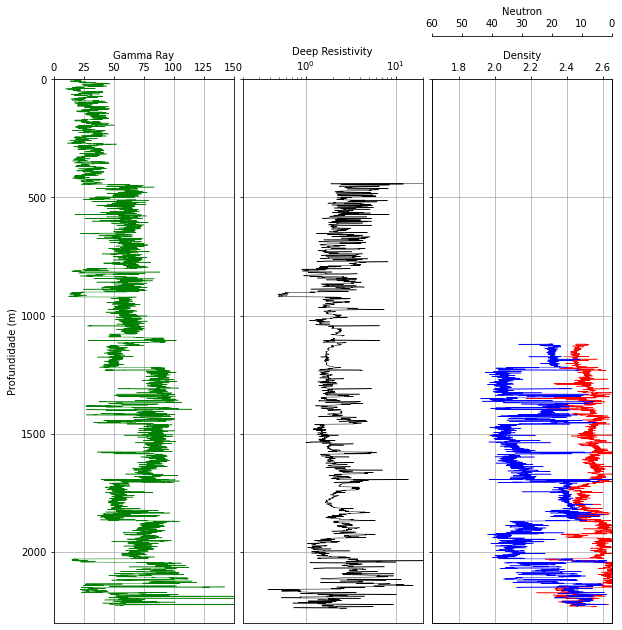

In [74]:
fig

## Melhorando a frequência de ticks

Trazendo todo o código do gráfico novamente:

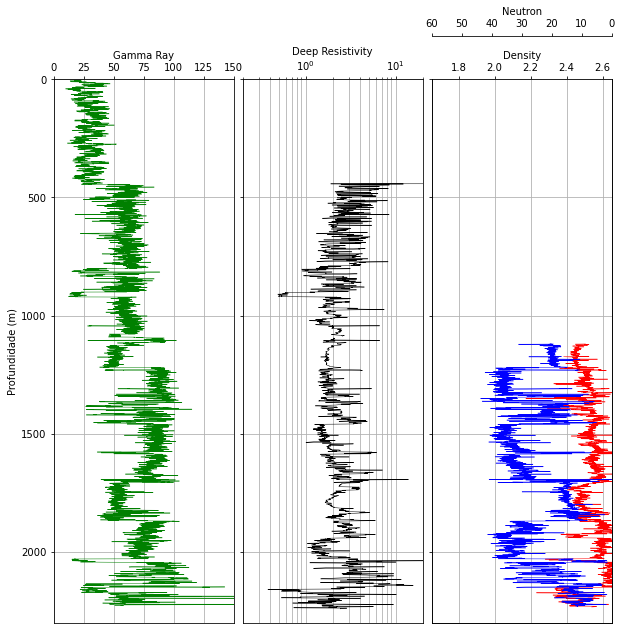

In [75]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma Ray', 'Deep Resistivity', 'Density', 'Neutron']

# Criando os axes
# Perceba que o número de colunas não é aumentado!
ax1= plt.subplot2grid((1, 3), (0, 0))
ax2= plt.subplot2grid((1, 3), (0, 1))
ax3= plt.subplot2grid((1, 3), (0, 2))

# NOVIDADE!
ax4= ax3.twiny()

ax1.plot('GR', 'MD', data=well, color='green', lw =0.5) #lw para alterar a espessura da linha
ax1.set_ylabel('Profundidade (m)')
ax1.set_xlim(0, 150)

ax2.plot('ILD', 'MD', data=well, color='black', lw =0.5)
ax2.set_xlim(0.2, 20)
ax2.semilogx()

ax3.plot('DENS', 'MD', data=well, color='red', lw =0.5)
ax3.set_xlim(1.65, 2.65)

# Parâmetros da nova curva inseridos normalmente
ax4.plot('NEU', 'MD', data=well, color='blue', lw =0.5)
ax4.set_xlim(60, 0)

for x, ax in enumerate(fig.axes):
    ax.set_ylim(2300, 0)
    
    ax.xaxis.set_ticks_position('top') # Colocando escala x para cima
    ax.xaxis.set_label_position('top') # Colocando legendas do eixo x para cima
    
    ax.set_xlabel(curve_names[x])
    
    if curve_names[x] == 'Neutron':
        # Colocando o título do Neutron mais acima
        ax.spines['top'].set_position(('axes', 1.08))  
        
        # Tirando o grid do Neutron para melhor visualização do Track
        ax.grid(False)
    else:
        ax.grid(True, which='both')

# Retirando labes do eixo y dos Axes (Tracks) 2 e 3
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
#Reduzindo o espaço entre os Tracks
fig.subplots_adjust(wspace=0.05)


Para melhorar a visualização, podemos alterar a frequências dos ticks = valores visíveis nos grids

Para isso, usamos a função xticks ou yticks do plt.

In [76]:
# Definindo a frequência de cada curva
gr_freq = np.arange(0, 150, 50)
res_freq = [0.2, 2, 20]
dens_freq = np.arange(1.65, 2.65, 0.2)
neu_freq = np.arange(60, 0, -10)

ticks_freq = [gr_freq, res_freq, dens_freq, neu_freq]

for x, ax in enumerate(fig.axes):
    ax.set_xticks(ticks_freq[x])


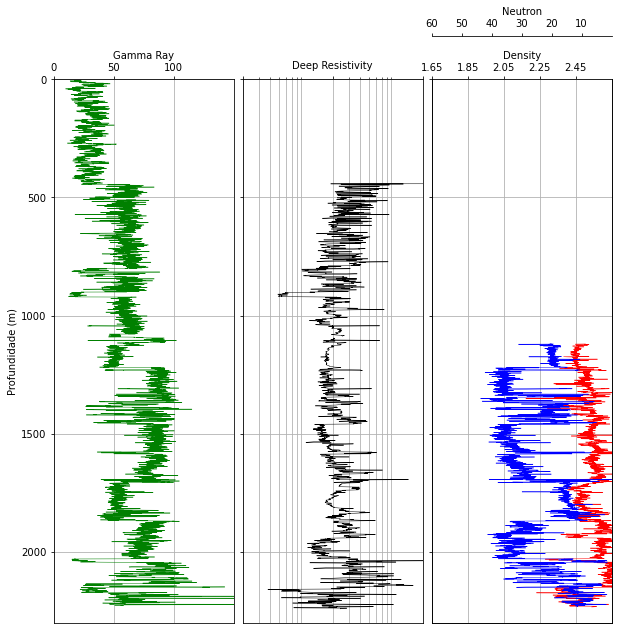

In [77]:
fig

Preciso melhorar o label da escala logarítmica da Resistividade.

Também é preciso aprender a mostrar o último tick de cada curva.

Soluções em breve!